# MELD Dataset Exploratory Data Analysis for Emotion Recognition
# Sentiment and emotion analysis for customer service chatbot conversations

## 1. Import Required Libraries

In [3]:
#!pip install wget

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Download and Extract MELD Dataset

In [6]:
'''
if not os.path.exists('data'):
    os.makedirs('data')
# Download MELD dataset if not already present
meld_url = "http://web.eecs.umich.edu/~mihalcea/downloads/MELD.Raw.tar.gz"
output_path = "data/MELD.Raw.tar.gz"

if not os.path.exists(output_path):
    print("Downloading MELD dataset...")
    wget.download(meld_url, output_path)
    print("\nDownload completed!")
else:
    print("Dataset already downloaded.")

# Extract the dataset
import tarfile
if not os.path.exists('data/MELD.Raw'):
    print("Extracting dataset...")
    with tarfile.open(output_path, 'r:gz') as tar:
        tar.extractall('data/')
    print("Extraction completed!")
'''

'\nif not os.path.exists(\'data\'):\n    os.makedirs(\'data\')\n# Download MELD dataset if not already present\nmeld_url = "http://web.eecs.umich.edu/~mihalcea/downloads/MELD.Raw.tar.gz"\noutput_path = "data/MELD.Raw.tar.gz"\n\nif not os.path.exists(output_path):\n    print("Downloading MELD dataset...")\n    wget.download(meld_url, output_path)\n    print("\nDownload completed!")\nelse:\n    print("Dataset already downloaded.")\n\n# Extract the dataset\nimport tarfile\nif not os.path.exists(\'data/MELD.Raw\'):\n    print("Extracting dataset...")\n    with tarfile.open(output_path, \'r:gz\') as tar:\n        tar.extractall(\'data/\')\n    print("Extraction completed!")\n'

## 3. Load Dataset Files


In [7]:
# Define paths to the CSV files
# Use raw GitHub URLs for direct file access
train_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/train_sent_emo.csv'
dev_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/dev_sent_emo.csv'
test_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/test_sent_emo.csv'

# Load the datasets
print("Loading datasets...")
train_df = pd.read_csv(train_path)
dev_df = pd.read_csv(dev_path)
test_df = pd.read_csv(test_path)

print(f"Train set loaded: {train_df.shape}")
print(f"Dev set loaded: {dev_df.shape}")
print(f"Test set loaded: {test_df.shape}")

Loading datasets...
Train set loaded: (9989, 11)
Dev set loaded: (1109, 11)
Test set loaded: (2610, 11)


## 4. Initial Data Exploration

In [8]:
# Display basic information about the training dataset
print("=== Training Dataset Info ===")
print(train_df.info())
print("\n=== First 5 rows of training data ===")
print(train_df.head())

# Check column names
print("\n=== Column Names ===")
print(train_df.columns.tolist())

=== Training Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB
None

=== First 5 rows of training data ===
   Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my company’s tr...         Chandler   
1       2                   You must’ve had your hands full

In [9]:
# Display basic information about the training dataset
print("=== Training Dataset Info ===")
print(train_df.info())
print("\n=== First 5 rows of training data ===")
print(train_df.head())

# Check column names
print("\n=== Column Names ===")
print(train_df.columns.tolist())

=== Training Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB
None

=== First 5 rows of training data ===
   Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my company’s tr...         Chandler   
1       2                   You must’ve had your hands full

## 5. Dataset Statistics

In [10]:
# Combined dataset statistics
total_utterances = len(train_df) + len(dev_df) + len(test_df)
print(f"Total utterances in dataset: {total_utterances}")
print(f"Training set: {len(train_df)} ({len(train_df)/total_utterances*100:.1f}%)")
print(f"Development set: {len(dev_df)} ({len(dev_df)/total_utterances*100:.1f}%)")
print(f"Test set: {len(test_df)} ({len(test_df)/total_utterances*100:.1f}%)")

# Check for missing values
print("\n=== Missing Values in Training Set ===")
print(train_df.isnull().sum())

Total utterances in dataset: 13708
Training set: 9989 (72.9%)
Development set: 1109 (8.1%)
Test set: 2610 (19.0%)

=== Missing Values in Training Set ===
Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64


## 6. Emotion Distribution Analysis

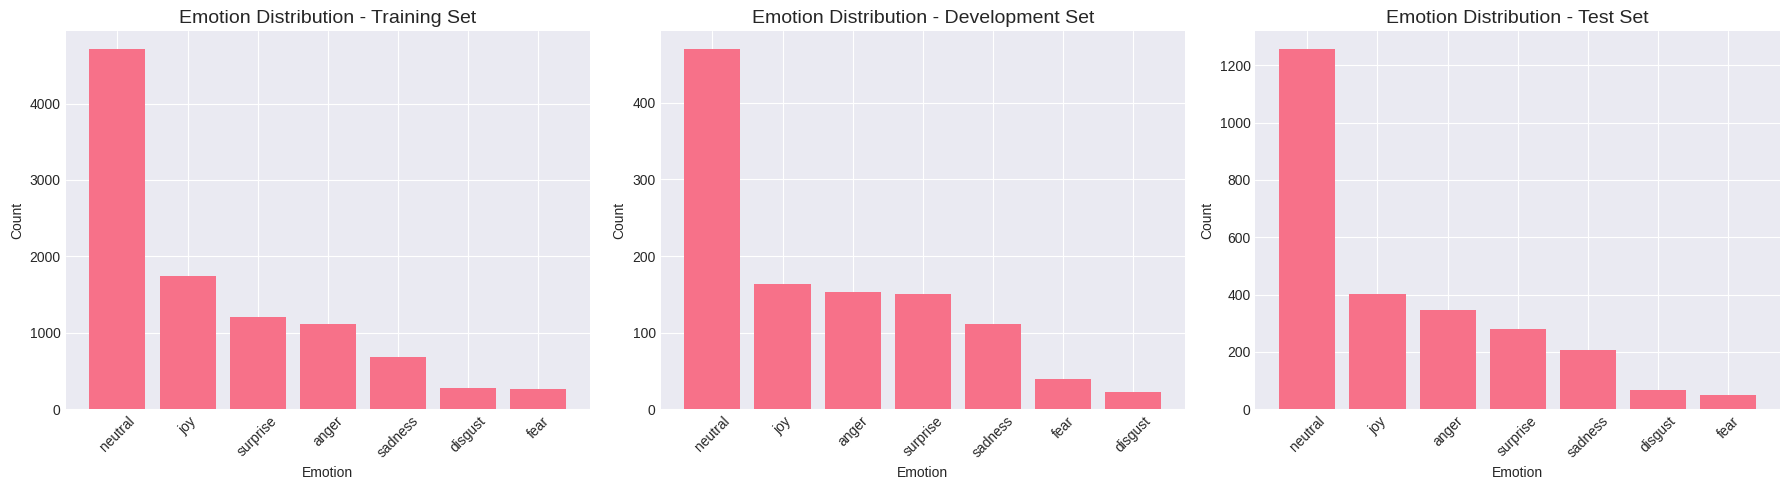

In [11]:
# Analyze emotion distribution across datasets
def plot_emotion_distribution(train_df, dev_df, test_df):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Training set
    emotion_counts_train = train_df['Emotion'].value_counts()
    axes[0].bar(emotion_counts_train.index, emotion_counts_train.values)
    axes[0].set_title('Emotion Distribution - Training Set', fontsize=14)
    axes[0].set_xlabel('Emotion')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

    # Dev set
    emotion_counts_dev = dev_df['Emotion'].value_counts()
    axes[1].bar(emotion_counts_dev.index, emotion_counts_dev.values)
    axes[1].set_title('Emotion Distribution - Development Set', fontsize=14)
    axes[1].set_xlabel('Emotion')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

    # Test set
    emotion_counts_test = test_df['Emotion'].value_counts()
    axes[2].bar(emotion_counts_test.index, emotion_counts_test.values)
    axes[2].set_title('Emotion Distribution - Test Set', fontsize=14)
    axes[2].set_xlabel('Emotion')
    axes[2].set_ylabel('Count')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_emotion_distribution(train_df, dev_df, test_df)

In [12]:
# Overall emotion distribution
all_emotions = pd.concat([train_df['Emotion'], dev_df['Emotion'], test_df['Emotion']])
emotion_dist = all_emotions.value_counts()
print("\n=== Overall Emotion Distribution ===")
print(emotion_dist)
print(f"\nTotal unique emotions: {len(emotion_dist)}")


=== Overall Emotion Distribution ===
Emotion
neutral     6436
joy         2308
surprise    1636
anger       1607
sadness     1002
disgust      361
fear         358
Name: count, dtype: int64

Total unique emotions: 7


## 7. Sentiment Distribution Analysis

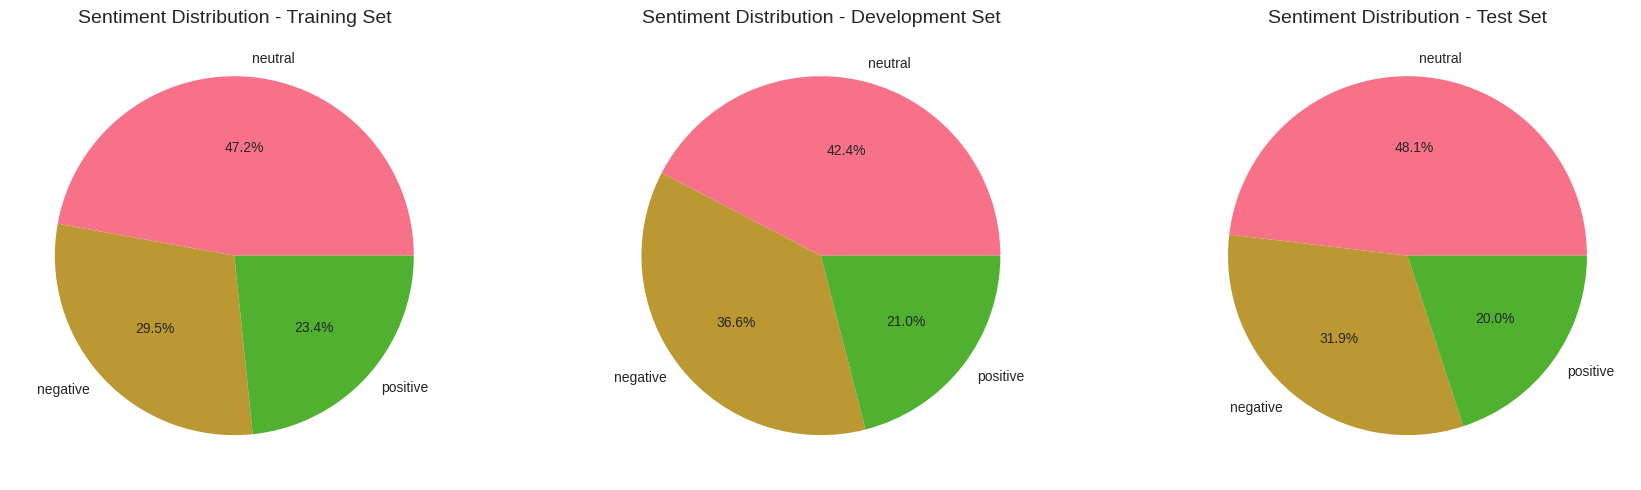

In [13]:
# Analyze sentiment distribution
def plot_sentiment_distribution(train_df, dev_df, test_df):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    datasets = [('Training', train_df), ('Development', dev_df), ('Test', test_df)]

    for idx, (name, df) in enumerate(datasets):
        sentiment_counts = df['Sentiment'].value_counts()
        axes[idx].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
        axes[idx].set_title(f'Sentiment Distribution - {name} Set', fontsize=14)

    plt.tight_layout()
    plt.show()

plot_sentiment_distribution(train_df, dev_df, test_df)

In [14]:
# Overall sentiment distribution
all_sentiments = pd.concat([train_df['Sentiment'], dev_df['Sentiment'], test_df['Sentiment']])
sentiment_dist = all_sentiments.value_counts()
print("\n=== Overall Sentiment Distribution ===")
print(sentiment_dist)


=== Overall Sentiment Distribution ===
Sentiment
neutral     6436
negative    4184
positive    3088
Name: count, dtype: int64


## 8. Text Length Analysis

In [15]:
# Analyze utterance lengths
train_df['utterance_length'] = train_df['Utterance'].apply(lambda x: len(str(x).split()))
dev_df['utterance_length'] = dev_df['Utterance'].apply(lambda x: len(str(x).split()))
test_df['utterance_length'] = test_df['Utterance'].apply(lambda x: len(str(x).split()))

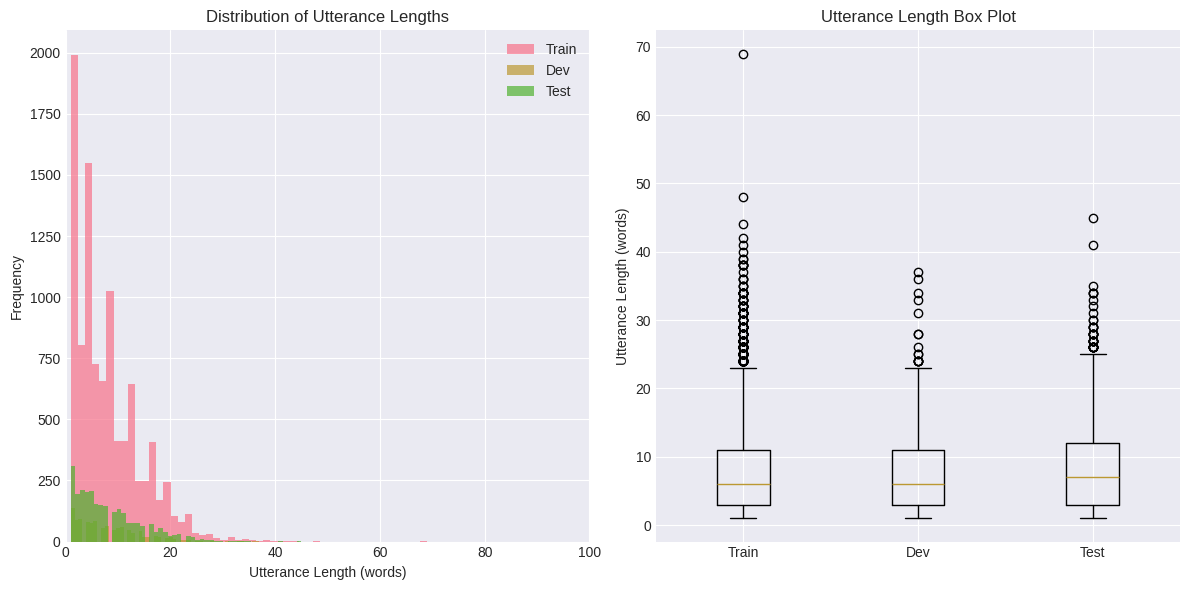

In [16]:
# Plot utterance length distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_df['utterance_length'], bins=50, alpha=0.7, label='Train')
plt.hist(dev_df['utterance_length'], bins=50, alpha=0.7, label='Dev')
plt.hist(test_df['utterance_length'], bins=50, alpha=0.7, label='Test')
plt.xlabel('Utterance Length (words)')
plt.ylabel('Frequency')
plt.title('Distribution of Utterance Lengths')
plt.legend()
plt.xlim(0, 100)

plt.subplot(1, 2, 2)
plt.boxplot([train_df['utterance_length'], dev_df['utterance_length'], test_df['utterance_length']],
            labels=['Train', 'Dev', 'Test'])
plt.ylabel('Utterance Length (words)')
plt.title('Utterance Length Box Plot')
plt.tight_layout()
plt.show()

In [17]:
# Statistics
print("=== Utterance Length Statistics ===")
print(f"Training set - Mean: {train_df['utterance_length'].mean():.2f}, Median: {train_df['utterance_length'].median():.0f}, Max: {train_df['utterance_length'].max()}")
print(f"Dev set - Mean: {dev_df['utterance_length'].mean():.2f}, Median: {dev_df['utterance_length'].median():.0f}, Max: {dev_df['utterance_length'].max()}")
print(f"Test set - Mean: {test_df['utterance_length'].mean():.2f}, Median: {test_df['utterance_length'].median():.0f}, Max: {test_df['utterance_length'].max()}")

=== Utterance Length Statistics ===
Training set - Mean: 7.95, Median: 6, Max: 69
Dev set - Mean: 7.91, Median: 6, Max: 37
Test set - Mean: 8.21, Median: 7, Max: 45


## 9. Speaker Analysis

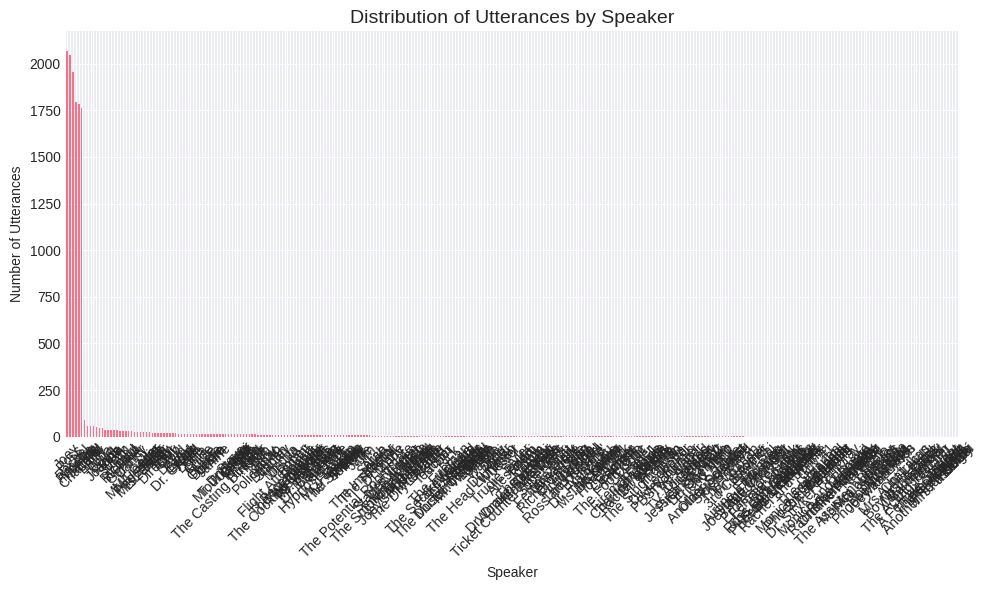

Total unique speakers: 304

=== Speaker Distribution ===
Speaker
Joey        2070
Ross        2048
Rachel      1955
Phoebe      1797
Monica      1782
            ... 
Waiter         1
Cookie         1
Passerby       1
Petrie         1
Sergei         1
Name: count, Length: 304, dtype: int64


In [18]:
# Analyze speaker distribution
all_speakers = pd.concat([train_df['Speaker'], dev_df['Speaker'], test_df['Speaker']])
speaker_counts = all_speakers.value_counts()

plt.figure(figsize=(10, 6))
speaker_counts.plot(kind='bar')
plt.title('Distribution of Utterances by Speaker', fontsize=14)
plt.xlabel('Speaker')
plt.ylabel('Number of Utterances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Total unique speakers: {len(speaker_counts)}")
print("\n=== Speaker Distribution ===")
print(speaker_counts)

## 10. Emotion-Sentiment Correlation

=== Training Set Emotion-Sentiment Correlation ===


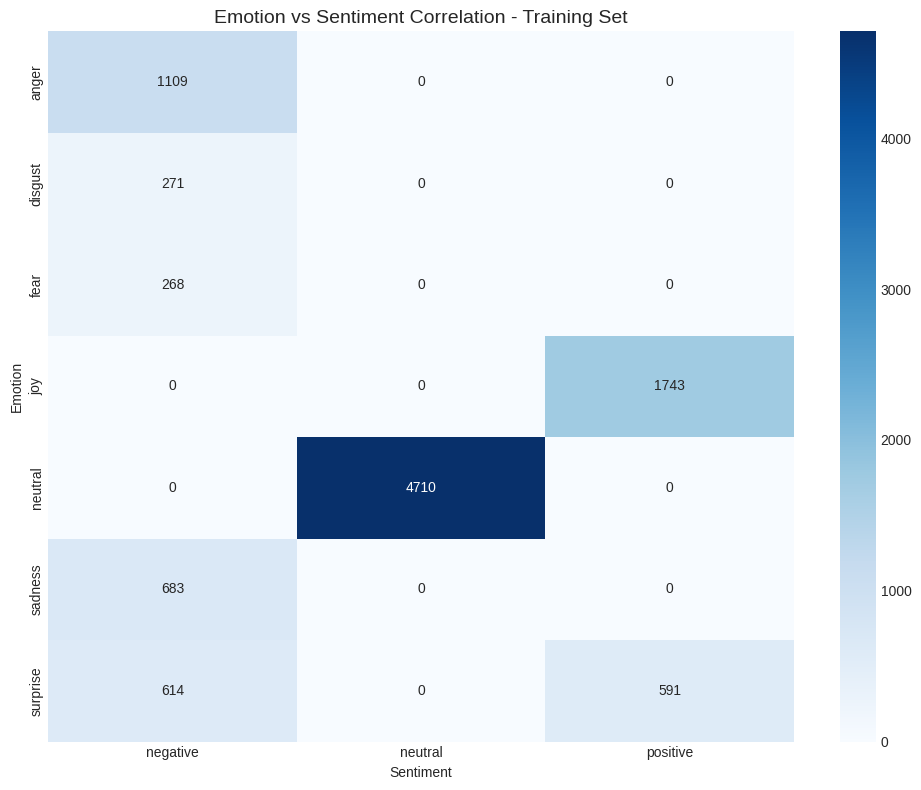

In [19]:
# Analyze correlation between emotion and sentiment
def create_emotion_sentiment_heatmap(df, title):
    emotion_sentiment_crosstab = pd.crosstab(df['Emotion'], df['Sentiment'])

    plt.figure(figsize=(10, 8))
    sns.heatmap(emotion_sentiment_crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Emotion vs Sentiment Correlation - {title}', fontsize=14)
    plt.xlabel('Sentiment')
    plt.ylabel('Emotion')
    plt.tight_layout()
    plt.show()

    return emotion_sentiment_crosstab

print("=== Training Set Emotion-Sentiment Correlation ===")
train_crosstab = create_emotion_sentiment_heatmap(train_df, 'Training Set')

## 11. Dialogue Context Analysis

Total dialogues in training set: 1038
Average utterances per dialogue: 9.62
Min utterances in a dialogue: 1
Max utterances in a dialogue: 24


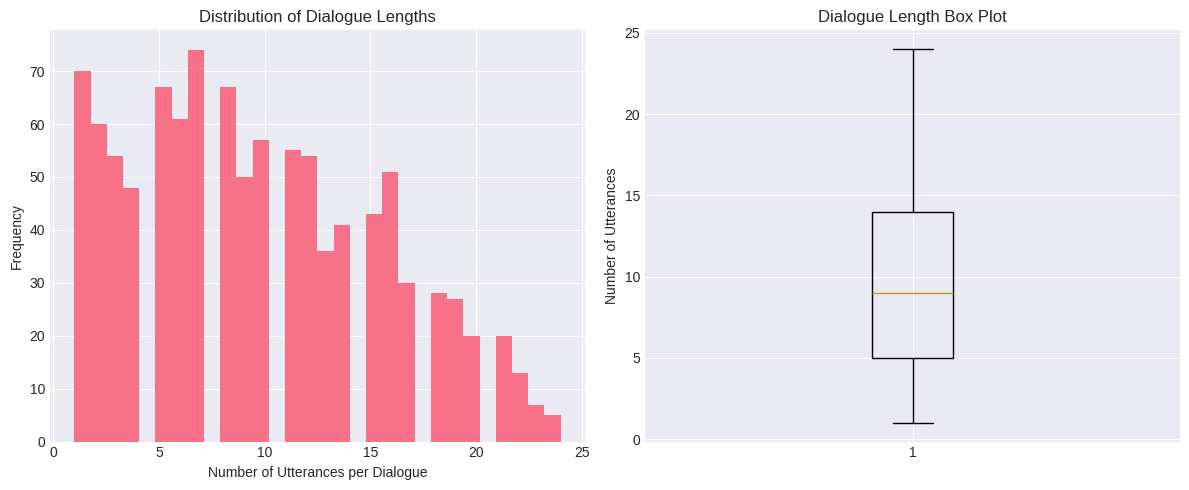

In [20]:
# Analyze dialogue structure
dialogue_counts = train_df['Dialogue_ID'].value_counts()
print(f"Total dialogues in training set: {len(dialogue_counts)}")
print(f"Average utterances per dialogue: {dialogue_counts.mean():.2f}")
print(f"Min utterances in a dialogue: {dialogue_counts.min()}")
print(f"Max utterances in a dialogue: {dialogue_counts.max()}")

# Plot dialogue length distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(dialogue_counts.values, bins=30)
plt.xlabel('Number of Utterances per Dialogue')
plt.ylabel('Frequency')
plt.title('Distribution of Dialogue Lengths')

plt.subplot(1, 2, 2)
plt.boxplot(dialogue_counts.values)
plt.ylabel('Number of Utterances')
plt.title('Dialogue Length Box Plot')
plt.tight_layout()
plt.show()

## 12. Sample Conversations Analysis

In [21]:
# Display sample conversations with emotions
def display_sample_dialogue(df, dialogue_id, max_utterances=10):
    dialogue = df[df['Dialogue_ID'] == dialogue_id].head(max_utterances)
    print(f"\n=== Sample Dialogue (ID: {dialogue_id}) ===")
    for idx, row in dialogue.iterrows():
        print(f"{row['Speaker']}: {row['Utterance']}")
        print(f"   Emotion: {row['Emotion']}, Sentiment: {row['Sentiment']}")
        print()

# Display a few sample dialogues
sample_dialogue_ids = train_df['Dialogue_ID'].unique()[:3]
for dialogue_id in sample_dialogue_ids:
    display_sample_dialogue(train_df, dialogue_id)


=== Sample Dialogue (ID: 0) ===
Chandler: also I was the point person on my company’s transition from the KL-5 to GR-6 system.
   Emotion: neutral, Sentiment: neutral

The Interviewer: You must’ve had your hands full.
   Emotion: neutral, Sentiment: neutral

Chandler: That I did. That I did.
   Emotion: neutral, Sentiment: neutral

The Interviewer: So let’s talk a little bit about your duties.
   Emotion: neutral, Sentiment: neutral

Chandler: My duties?  All right.
   Emotion: surprise, Sentiment: positive

The Interviewer: Now you’ll be heading a whole division, so you’ll have a lot of duties.
   Emotion: neutral, Sentiment: neutral

Chandler: I see.
   Emotion: neutral, Sentiment: neutral

The Interviewer: But there’ll be perhaps 30 people under you so you can dump a certain amount on them.
   Emotion: neutral, Sentiment: neutral

Chandler: Good to know.
   Emotion: neutral, Sentiment: neutral

The Interviewer: We can go into detail
   Emotion: neutral, Sentiment: neutral


=== Sam

## 13. Word Frequency Analysis

In [22]:
from collections import Counter
import re

# Function to clean and tokenize text
def tokenize(text):
    # Convert to lowercase and remove punctuation
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text.split()

# Get word frequencies for each emotion
emotion_words = {}
for emotion in train_df['Emotion'].unique():
    emotion_utterances = train_df[train_df['Emotion'] == emotion]['Utterance']
    all_words = []
    for utterance in emotion_utterances:
        all_words.extend(tokenize(utterance))
    emotion_words[emotion] = Counter(all_words).most_common(20)

In [23]:
# Display top words for each emotion
print("=== Top 10 Words per Emotion ===")
for emotion, word_counts in emotion_words.items():
    print(f"\n{emotion}:")
    for word, count in word_counts[:10]:
        print(f"  {word}: {count}")

=== Top 10 Words per Emotion ===

neutral:
  you: 1373
  i: 1318
  the: 916
  to: 783
  a: 773
  and: 538
  that: 457
  it: 449
  okay: 425
  yeah: 406

surprise:
  you: 387
  what: 254
  oh: 238
  i: 211
  the: 150
  my: 138
  a: 124
  that: 122
  god: 114
  are: 105

fear:
  i: 132
  you: 82
  to: 57
  a: 45
  no: 44
  dont: 39
  oh: 37
  im: 37
  and: 33
  the: 33

sadness:
  i: 364
  you: 190
  to: 162
  the: 143
  a: 126
  im: 120
  and: 119
  sorry: 97
  it: 95
  me: 92

joy:
  i: 535
  you: 499
  the: 287
  to: 251
  a: 249
  oh: 232
  and: 223
  it: 216
  so: 164
  hey: 143

disgust:
  you: 96
  i: 78
  the: 74
  a: 69
  to: 51
  and: 44
  that: 44
  oh: 41
  no: 35
  it: 33

anger:
  you: 431
  i: 374
  the: 247
  to: 218
  and: 174
  a: 168
  it: 157
  that: 143
  me: 137
  no: 130


## 14. Emotion Transition Analysis

In [24]:
# Analyze emotion transitions within dialogues
def analyze_emotion_transitions(df):
    transitions = []

    for dialogue_id in df['Dialogue_ID'].unique():
        dialogue = df[df['Dialogue_ID'] == dialogue_id].sort_values('Utterance_ID')
        emotions = dialogue['Emotion'].tolist()

        for i in range(len(emotions) - 1):
            transitions.append((emotions[i], emotions[i+1]))

    return Counter(transitions)

In [25]:
# Get emotion transitions
transitions = analyze_emotion_transitions(train_df)
top_transitions = transitions.most_common(15)

print("=== Top 15 Emotion Transitions ===")
for (from_emotion, to_emotion), count in top_transitions:
    print(f"{from_emotion} → {to_emotion}: {count}")

=== Top 15 Emotion Transitions ===
neutral → neutral: 2354
neutral → joy: 631
joy → neutral: 602
joy → joy: 520
neutral → surprise: 500
surprise → neutral: 492
anger → neutral: 358
neutral → anger: 352
anger → anger: 314
neutral → sadness: 212
sadness → neutral: 206
surprise → surprise: 179
surprise → joy: 167
joy → surprise: 165
sadness → sadness: 147


In [26]:
# Create transition matrix
unique_emotions = sorted(train_df['Emotion'].unique())
transition_matrix = pd.DataFrame(0, index=unique_emotions, columns=unique_emotions)

for (from_emotion, to_emotion), count in transitions.items():
    transition_matrix.loc[from_emotion, to_emotion] = count

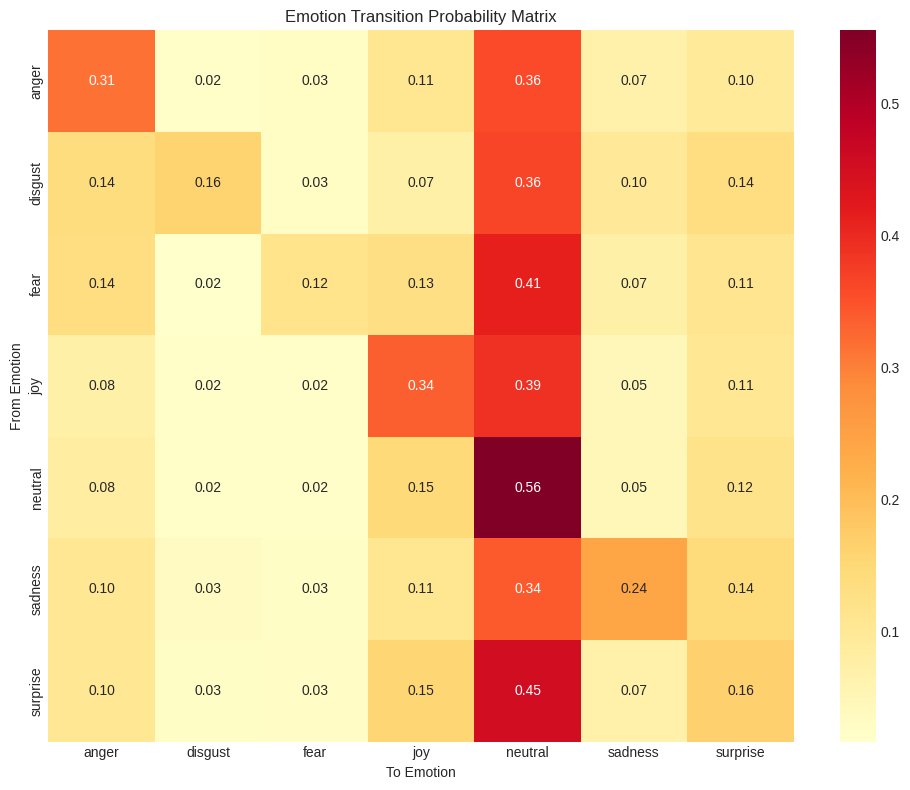

In [27]:
# Normalize by row to get probabilities
transition_prob = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

plt.figure(figsize=(10, 8))
sns.heatmap(transition_prob, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Emotion Transition Probability Matrix')
plt.xlabel('To Emotion')
plt.ylabel('From Emotion')
plt.tight_layout()
plt.show()

## 15. Summary Statistics and Insights

In [28]:
print("=== MELD Dataset Summary ===")
print(f"Total utterances: {total_utterances}")
print(f"Total unique dialogues: {len(pd.concat([train_df['Dialogue_ID'], dev_df['Dialogue_ID'], test_df['Dialogue_ID']]).unique())}")
print(f"Average utterance length: {pd.concat([train_df['utterance_length'], dev_df['utterance_length'], test_df['utterance_length']]).mean():.2f} words")
print(f"\nEmotion classes: {sorted(train_df['Emotion'].unique())}")
print(f"Sentiment classes: {sorted(train_df['Sentiment'].unique())}")

# Class imbalance analysis
print("\n=== Class Imbalance Analysis ===")
emotion_imbalance = emotion_dist.max() / emotion_dist.min()
sentiment_imbalance = sentiment_dist.max() / sentiment_dist.min()
print(f"Emotion class imbalance ratio: {emotion_imbalance:.2f}")
print(f"Sentiment class imbalance ratio: {sentiment_imbalance:.2f}")

=== MELD Dataset Summary ===
Total utterances: 13708
Total unique dialogues: 1039
Average utterance length: 8.00 words

Emotion classes: ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
Sentiment classes: ['negative', 'neutral', 'positive']

=== Class Imbalance Analysis ===
Emotion class imbalance ratio: 17.98
Sentiment class imbalance ratio: 2.08


In [29]:
# Key insights for model development
print("\n=== Key Insights for Model Development ===")
print("1. The dataset shows significant class imbalance, especially in emotions")
print("2. Neutral emotion is dominant, which might affect model performance")
print("3. Average utterance length is relatively short, suitable for transformer models")
print("4. Strong correlation between certain emotions and sentiments")
print("5. Context from dialogue flow could be important for emotion recognition")


=== Key Insights for Model Development ===
1. The dataset shows significant class imbalance, especially in emotions
2. Neutral emotion is dominant, which might affect model performance
3. Average utterance length is relatively short, suitable for transformer models
4. Strong correlation between certain emotions and sentiments
5. Context from dialogue flow could be important for emotion recognition


## 16. Prepare Data for Transformer Models

In [30]:
# Create a function to prepare data for transformer models
def prepare_for_transformers(df):
    """
    Prepare the dataset for transformer-based models
    """
    # Create emotion to index mapping
    emotion_to_idx = {emotion: idx for idx, emotion in enumerate(sorted(df['Emotion'].unique()))}
    sentiment_to_idx = {sentiment: idx for idx, sentiment in enumerate(sorted(df['Sentiment'].unique()))}

    # Add numerical labels
    df['emotion_label'] = df['Emotion'].map(emotion_to_idx)
    df['sentiment_label'] = df['Sentiment'].map(sentiment_to_idx)

    # Group by dialogue for context modeling
    dialogues = []
    for dialogue_id in df['Dialogue_ID'].unique():
        dialogue = df[df['Dialogue_ID'] == dialogue_id].sort_values('Utterance_ID')
        dialogues.append({
            'dialogue_id': dialogue_id,
            'utterances': dialogue['Utterance'].tolist(),
            'speakers': dialogue['Speaker'].tolist(),
            'emotions': dialogue['emotion_label'].tolist(),
            'sentiments': dialogue['sentiment_label'].tolist()
        })

    return dialogues, emotion_to_idx, sentiment_to_idx

In [31]:
# Prepare training data
train_dialogues, emotion_to_idx, sentiment_to_idx = prepare_for_transformers(train_df)
print(f"Prepared {len(train_dialogues)} dialogues for training")
print(f"\nEmotion mapping: {emotion_to_idx}")
print(f"\nSentiment mapping: {sentiment_to_idx}")

Prepared 1038 dialogues for training

Emotion mapping: {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'surprise': 6}

Sentiment mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


In [32]:
# Save mappings for later use
import json
if not os.path.exists('data'):
    os.makedirs('data')

mappings = {
    'emotion_to_idx': emotion_to_idx,
    'sentiment_to_idx': sentiment_to_idx,
    'idx_to_emotion': {v: k for k, v in emotion_to_idx.items()},
    'idx_to_sentiment': {v: k for k, v in sentiment_to_idx.items()}
}

with open('data/label_mappings.json', 'w') as f:
    json.dump(mappings, f, indent=2)
print("\nLabel mappings saved to 'data/label_mappings.json'")


Label mappings saved to 'data/label_mappings.json'


## Conclusion

This EDA reveals several important insights for building emotion recognition models:

1. **Class Imbalance**: The dataset shows significant imbalance, particularly with "neutral" emotion being dominant. Consider using weighted loss functions or resampling techniques.

2. **Multi-modal Nature**: While we focused on text, MELD includes audio and visual features that could enhance model performance.

3. **Context Importance**: Emotions often depend on dialogue context, making this dataset ideal for context-aware transformer models.

4. **Short Utterances**: Most utterances are relatively short (median ~10 words), which is suitable for transformer architectures.

5. **Speaker Patterns**: Different speakers show distinct emotion patterns, which could be leveraged in multi-speaker models.

Next steps:
- Implement transformer-based models (BERT, RoBERTa, etc.) for emotion classification
- Experiment with context-aware architectures that consider dialogue history
- Apply techniques to handle class imbalance
- Consider multi-task learning for joint emotion and sentiment prediction

# Model Implementation
Implementation of LSTM, BERT, RoBERTa with context-aware models using TensorFlow

## 1. Import Required Libraries and Setup

In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow_hub as hub
import tensorflow_text as text
from transformers import TFAutoModel, AutoTokenizer, TFBertModel, TFRobertaModel
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json
import pickle
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Set random seeds
def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seed(42)

In [35]:
# Check GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPU is available")
    # Enable mixed precision for better performance
    from tensorflow.keras.mixed_precision import set_global_policy
    set_global_policy('mixed_float16')

Num GPUs Available:  1
GPU is available


# 2. Data Preprocessing and Dataset Classes

In [36]:
import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer

class MELDDataGenerator(tf.keras.utils.Sequence):
    """Fixed data generator for MELD dataset with proper tokenization"""
    def __init__(self, dialogues, tokenizer, batch_size=32, max_length=128,
                 context_window=3, shuffle=True):
        self.dialogues = dialogues
        self.tokenizer = tokenizer
        self.batch_size = batch_size
        self.max_length = max_length
        self.context_window = context_window
        self.shuffle = shuffle

        # IMPORTANT: Set tokenizer max length
        self.tokenizer.model_max_length = max_length

        # Prepare data
        self.utterances = []
        self.contexts = []
        self.emotions = []
        self.sentiments = []
        self._prepare_data()

        self.indices = np.arange(len(self.utterances))
        if self.shuffle:
            np.random.shuffle(self.indices)

    def _prepare_data(self):
        """Flatten dialogues into utterances with context"""
        for dialogue in self.dialogues:
            utterances = dialogue['utterances']
            emotions = dialogue['emotions']
            sentiments = dialogue['sentiments']
            speakers = dialogue['speakers']

            for i in range(len(utterances)):
                # Current utterance - ensure it's a string
                self.utterances.append(str(utterances[i]))
                # Ensure emotions and sentiments are integers
                self.emotions.append(int(emotions[i]))
                self.sentiments.append(int(sentiments[i]))

                # Context (previous utterances)
                context = []
                for j in range(max(0, i - self.context_window), i):
                    context.append(f"{speakers[j]}: {utterances[j]}")
                self.contexts.append(" [SEP] ".join(context) if context else "")

    def __len__(self):
        return int(np.ceil(len(self.utterances) / self.batch_size))

    def __getitem__(self, idx):
        # Get batch indices
        start_idx = idx * self.batch_size
        end_idx = min((idx + 1) * self.batch_size, len(self.utterances))
        batch_indices = self.indices[start_idx:end_idx]

        batch_texts = []
        batch_emotions = []
        batch_sentiments = []

        for i in batch_indices:
            # Combine context and utterance
            if self.contexts[i]:
                text = f"{self.contexts[i]} [SEP] {self.utterances[i]}"
            else:
                text = self.utterances[i]

            batch_texts.append(text)
            batch_emotions.append(self.emotions[i])
            batch_sentiments.append(self.sentiments[i])

        # Tokenize batch with explicit parameters
        encoded = self.tokenizer(
            batch_texts,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='np',
            return_attention_mask=True,
            return_token_type_ids=False  # BERT might return this, we don't need it
        )

        # Ensure we have the right shape
        input_ids = encoded['input_ids']
        attention_mask = encoded['attention_mask']

        # Pad manually if needed (shouldn't be necessary but just in case)
        if input_ids.shape[1] < self.max_length:
            pad_length = self.max_length - input_ids.shape[1]
            input_ids = np.pad(input_ids, ((0, 0), (0, pad_length)),
                              constant_values=self.tokenizer.pad_token_id)
            attention_mask = np.pad(attention_mask, ((0, 0), (0, pad_length)),
                                   constant_values=0)
        elif input_ids.shape[1] > self.max_length:
            input_ids = input_ids[:, :self.max_length]
            attention_mask = attention_mask[:, :self.max_length]

        # Convert to proper numpy arrays with correct dtypes
        input_ids = np.array(input_ids, dtype=np.int32)
        attention_mask = np.array(attention_mask, dtype=np.int32)

        # Return dictionaries with numpy arrays
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask
        }, {
            'emotion': np.array(batch_emotions, dtype=np.int32),
            'sentiment': np.array(batch_sentiments, dtype=np.int32)
        }

    def on_epoch_end(self):
        """Shuffle indices after each epoch"""
        if self.shuffle:
            np.random.shuffle(self.indices)

In [37]:
# Test function to verify the generator works correctly
def test_data_generator(dialogues, tokenizer, batch_size=16, max_length=128):
    """Test the data generator to ensure it produces correct shapes"""
    print("Testing MELDDataGenerator...")

    # Create generator
    generator = MELDDataGenerator(
        dialogues[:10],  # Use only first 10 dialogues for testing
        tokenizer,
        batch_size=batch_size,
        max_length=max_length,
        shuffle=False
    )

    print(f"Total batches: {len(generator)}")
    print(f"Total samples: {len(generator.utterances)}")

    # Test first few batches
    for i in range(min(3, len(generator))):
        batch_x, batch_y = generator[i]
        print(f"\nBatch {i}:")
        print(f"  input_ids: {batch_x['input_ids'].shape}, dtype: {batch_x['input_ids'].dtype}")
        print(f"  attention_mask: {batch_x['attention_mask'].shape}, dtype: {batch_x['attention_mask'].dtype}")
        print(f"  emotion: {batch_y['emotion'].shape}, dtype: {batch_y['emotion'].dtype}")
        print(f"  sentiment: {batch_y['sentiment'].shape}, dtype: {batch_y['sentiment'].dtype}")

        # Check for consistency
        assert batch_x['input_ids'].shape[0] == batch_y['emotion'].shape[0], "Batch size mismatch!"
        assert batch_x['input_ids'].shape[1] == max_length, f"Max length mismatch! Expected {max_length}, got {batch_x['input_ids'].shape[1]}"

    print("\n✓ Data generator test passed!")

In [38]:
def create_tf_dataset(dialogues, tokenizer, batch_size=32, max_length=128,
                     context_window=3, shuffle=True):
    """Create TensorFlow dataset from dialogues"""
    utterances = []
    contexts = []
    emotions = []
    sentiments = []

    # Prepare data
    for dialogue in dialogues:
        utts = dialogue['utterances']
        emos = dialogue['emotions']
        sents = dialogue['sentiments']
        speakers = dialogue['speakers']

        for i in range(len(utts)):
            utterances.append(utts[i])
            emotions.append(emos[i])
            sentiments.append(sents[i])

            # Context
            context = []
            for j in range(max(0, i - context_window), i):
                context.append(f"{speakers[j]}: {utts[j]}")
            contexts.append(" [SEP] ".join(context) if context else "")

    # Create dataset from tensors
    dataset = tf.data.Dataset.from_tensor_slices((utterances, contexts, emotions, sentiments))

    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)

    # Map function to combine context and utterance and tokenize
    def map_fn(utterance, context, emotion, sentiment):
        text = tf.cond(tf.equal(tf.strings.length(context), 0),
                       lambda: utterance,
                       lambda: tf.strings.join([context, "[SEP]", utterance], separator=" "))

        # Tokenize
        encoded = tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='tf'
        )

        return {
            'input_ids': tf.squeeze(encoded['input_ids'], axis=0),
            'attention_mask': tf.squeeze(encoded['attention_mask'], axis=0)
        }, {
            'emotion': tf.cast(emotion, tf.int32),
            'sentiment': tf.cast(sentiment, tf.int32)
        }

    dataset = dataset.map(map_fn, num_parallel_calls=tf.data.AUTOTUNE)

    # Batch the dataset
    dataset = dataset.batch(batch_size)

    # Set the shapes of the batched tensors
    dataset = dataset.map(
        lambda x, y: (
            {'input_ids': tf.ensure_shape(x['input_ids'], (None, max_length)),
             'attention_mask': tf.ensure_shape(x['attention_mask'], (None, max_length))},
            {'emotion': tf.ensure_shape(y['emotion'], (None,)),
             'sentiment': tf.ensure_shape(y['sentiment'], (None,))}
        ),
        num_parallel_calls=tf.data.AUTOTUNE
    )


    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

In [39]:
def create_tf_dataset_2(dialogues, tokenizer, batch_size=32, max_length=128,
                     context_window=3, shuffle=True):
    """Create TensorFlow dataset from dialogues"""
    utterances = []
    contexts = []
    emotions = []
    sentiments = []

    # Prepare data
    for dialogue in dialogues:
        utts = dialogue['utterances']
        emos = dialogue['emotions']
        sents = dialogue['sentiments']
        speakers = dialogue['speakers']

        for i in range(len(utts)):
            utterances.append(utts[i])
            emotions.append(emos[i])
            sentiments.append(sents[i])

            # Context
            context = []
            for j in range(max(0, i - context_window), i):
                context.append(f"{speakers[j]}: {utts[j]}")
            contexts.append(" [SEP] ".join(context) if context else "")

    # Create dataset
    def generator():
        indices = np.arange(len(utterances))
        if shuffle:
            np.random.shuffle(indices)

        for i in indices:
            text = f"{contexts[i]} [SEP] {utterances[i]}" if contexts[i] else utterances[i]
            yield text, emotions[i], sentiments[i]

    # Define output signature
    output_signature = (
        tf.TensorSpec(shape=(), dtype=tf.string),
        tf.TensorSpec(shape=(), dtype=tf.int32),
        tf.TensorSpec(shape=(), dtype=tf.int32)
    )

    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=output_signature
    )

    # Tokenize and batch
    def tokenize_batch(texts, emotions, sentiments):
        # This will be called with batched data
        encoded = tokenizer(
            texts.numpy().tolist(),
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors='tf'
        )

        return {
            'input_ids': encoded['input_ids'],
            'attention_mask': encoded['attention_mask'],
            'emotion_labels': emotions,
            'sentiment_labels': sentiments
        }

    dataset = dataset.batch(batch_size)
    dataset = dataset.map(
        lambda x, y, z: tf.py_function(
            tokenize_batch,
            [x, y, z],
            {
                'input_ids': tf.int32,
                'attention_mask': tf.int32,
                'emotion_labels': tf.int32,
                'sentiment_labels': tf.int32
            }
        ),
        num_parallel_calls=tf.data.AUTOTUNE
    )

    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)

    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset

## 3. Model Architectures

### 3.1 LSTM-based Model

In [40]:
class LSTMEmotionModel(tf.keras.Model):
    """LSTM model for emotion and sentiment classification"""
    def __init__(self, vocab_size, embedding_dim=300, lstm_units=256,
                 num_emotions=7, num_sentiments=3, dropout_rate=0.3):
        super(LSTMEmotionModel, self).__init__()

        # Embedding layer
        self.embedding = layers.Embedding(vocab_size, embedding_dim)

        # LSTM layers
        self.lstm1 = layers.Bidirectional(
            layers.LSTM(lstm_units, return_sequences=True, dropout=dropout_rate)
        )
        self.lstm2 = layers.Bidirectional(
            layers.LSTM(lstm_units, dropout=dropout_rate)
        )

        # Dropout
        self.dropout = layers.Dropout(dropout_rate)

        # Task-specific heads
        self.emotion_dense = layers.Dense(128, activation='relu')
        self.emotion_output = layers.Dense(num_emotions, name='emotion')

        self.sentiment_dense = layers.Dense(128, activation='relu')
        self.sentiment_output = layers.Dense(num_sentiments, name='sentiment')

    def call(self, inputs, training=False):
        # Embedding
        x = self.embedding(inputs['input_ids'])

        # LSTM encoding
        x = self.lstm1(x, training=training)
        x = self.lstm2(x, training=training)

        # Dropout
        x = self.dropout(x, training=training)

        # Task-specific predictions
        emotion_features = self.emotion_dense(x)
        emotion_logits = self.emotion_output(emotion_features)

        sentiment_features = self.sentiment_dense(x)
        sentiment_logits = self.sentiment_output(sentiment_features)

        return {
            'emotion': emotion_logits,
            'sentiment': sentiment_logits
        }

### 3.2 BERT-based Multi-Task Model

In [60]:
# Disable mixed precision for inference to avoid dtype issues
tf.keras.mixed_precision.set_global_policy('float32')

class BERTMultiTaskModel(tf.keras.Model):
    """BERT model for multi-task emotion and sentiment classification"""
    def __init__(self, model_name='bert-base-uncased', num_emotions=7,
                 num_sentiments=3, dropout_rate=0.3):
        super(BERTMultiTaskModel, self).__init__()

        # BERT encoder
        self.bert = TFAutoModel.from_pretrained(model_name)
        hidden_size = self.bert.config.hidden_size

        # Freeze BERT layers initially (optional)
        self.bert.trainable = True

        # Dropout
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

        # Emotion classification head
        self.emotion_dense1 = tf.keras.layers.Dense(hidden_size, activation='relu')
        self.emotion_dropout = tf.keras.layers.Dropout(dropout_rate)
        self.emotion_dense2 = tf.keras.layers.Dense(hidden_size // 2, activation='relu')
        self.emotion_output = tf.keras.layers.Dense(num_emotions, name='emotion')

        # Sentiment classification head
        self.sentiment_dense1 = tf.keras.layers.Dense(hidden_size, activation='relu')
        self.sentiment_dropout = tf.keras.layers.Dropout(dropout_rate)
        self.sentiment_dense2 = tf.keras.layers.Dense(hidden_size // 2, activation='relu')
        self.sentiment_output = tf.keras.layers.Dense(num_sentiments, name='sentiment')

    def call(self, inputs, training=False):
        # Ensure input_ids are int32
        input_ids = tf.cast(inputs['input_ids'], tf.int32)
        attention_mask = tf.cast(inputs['attention_mask'], tf.int32)

        # BERT encoding
        bert_outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            training=training
        )

        # Use pooled output (CLS token)
        pooled_output = bert_outputs.pooler_output
        pooled_output = self.dropout(pooled_output, training=training)

        # Emotion prediction
        emotion_x = self.emotion_dense1(pooled_output)
        emotion_x = self.emotion_dropout(emotion_x, training=training)
        emotion_x = self.emotion_dense2(emotion_x)
        emotion_logits = self.emotion_output(emotion_x)

        # Sentiment prediction
        sentiment_x = self.sentiment_dense1(pooled_output)
        sentiment_x = self.sentiment_dropout(sentiment_x, training=training)
        sentiment_x = self.sentiment_dense2(sentiment_x)
        sentiment_logits = self.sentiment_output(sentiment_x)

        return {
            'emotion': emotion_logits,
            'sentiment': sentiment_logits
        }

### 3.3 Context-Aware DialogueRNN Model

In [42]:
class DialogueRNN(tf.keras.Model):
    """DialogueRNN for context-aware emotion recognition"""
    def __init__(self, encoder_model, hidden_dim=128, num_emotions=7,
                 num_sentiments=3, num_speakers=6, dropout_rate=0.3):
        super(DialogueRNN, self).__init__()

        self.encoder = encoder_model
        self.hidden_dim = hidden_dim

        # Global GRU for context
        self.global_gru = layers.Bidirectional(
            layers.GRU(hidden_dim, return_sequences=True)
        )

        # Speaker GRUs
        self.speaker_grus = [
            layers.GRU(hidden_dim, return_sequences=True)
            for _ in range(num_speakers)
        ]

        # Emotion GRU
        self.emotion_gru = layers.GRU(hidden_dim, return_sequences=True)

        # Attention mechanism
        self.attention = layers.MultiHeadAttention(
            num_heads=8, key_dim=hidden_dim
        )

        # Dropout
        self.dropout = layers.Dropout(dropout_rate)

        # Classification heads
        self.emotion_output = layers.Dense(num_emotions, name='emotion')
        self.sentiment_output = layers.Dense(num_sentiments, name='sentiment')

    def call(self, inputs, speaker_ids=None, training=False):
        # Encode utterances
        encoded = self.encoder(inputs, training=training)

        # Get sequence of hidden states
        if hasattr(encoded, 'last_hidden_state'):
            utterance_features = encoded.last_hidden_state
        else:
            utterance_features = encoded[0]  # For some models

        # Global context
        global_context = self.global_gru(utterance_features, training=training)

        # Apply attention
        attended_features = self.attention(
            utterance_features, global_context,
            training=training
        )

        # Emotion modeling
        emotion_features = self.emotion_gru(attended_features, training=training)
        emotion_features = self.dropout(emotion_features, training=training)

        # Get final hidden state for classification
        final_features = emotion_features[:, -1, :]

        # Predictions
        emotion_logits = self.emotion_output(final_features)
        sentiment_logits = self.sentiment_output(final_features)

        return {
            'emotion': emotion_logits,
            'sentiment': sentiment_logits
        }

### 3.4 COSMIC-style Model with Attention

In [43]:
class COSMICModel(tf.keras.Model):
    """COSMIC-style model with commonsense reasoning"""
    def __init__(self, model_name='roberta-base', num_emotions=7,
                 num_sentiments=3, dropout_rate=0.3):
        super(COSMICModel, self).__init__()

        # Main encoder
        self.encoder = TFAutoModel.from_pretrained(model_name)
        hidden_size = self.encoder.config.hidden_size

        # Commonsense encoder (can be same or different model)
        self.commonsense_encoder = TFAutoModel.from_pretrained('bert-base-uncased')

        # Cross-attention for fusion
        self.cross_attention = layers.MultiHeadAttention(
            num_heads=8, key_dim=hidden_size // 8
        )

        # Fusion layers
        self.fusion_dense1 = layers.Dense(hidden_size, activation='relu')
        self.fusion_dropout = layers.Dropout(dropout_rate)
        self.fusion_dense2 = layers.Dense(hidden_size // 2, activation='relu')

        # Self-attention
        self.self_attention = layers.MultiHeadAttention(
            num_heads=8, key_dim=hidden_size // 16
        )

        # Classification heads
        self.emotion_output = layers.Dense(num_emotions, name='emotion')
        self.sentiment_output = layers.Dense(num_sentiments, name='sentiment')

        self.dropout = layers.Dropout(dropout_rate)

    def call(self, inputs, commonsense_inputs=None, training=False):
        # Encode utterance
        utterance_outputs = self.encoder(
            inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            training=training
        )
        utterance_features = utterance_outputs.pooler_output

        if commonsense_inputs is not None:
            # Encode commonsense
            commonsense_outputs = self.commonsense_encoder(
                commonsense_inputs['input_ids'],
                attention_mask=commonsense_inputs['attention_mask'],
                training=training
            )
            commonsense_features = commonsense_outputs.pooler_output

            # Cross-attention fusion
            utterance_features = tf.expand_dims(utterance_features, axis=1)
            commonsense_features = tf.expand_dims(commonsense_features, axis=1)

            fused_features = self.cross_attention(
                utterance_features,
                commonsense_features,
                training=training
            )
            fused_features = tf.squeeze(fused_features, axis=1)

            # Further fusion
            fused_features = self.fusion_dense1(fused_features)
            fused_features = self.fusion_dropout(fused_features, training=training)
            final_features = self.fusion_dense2(fused_features)
        else:
            final_features = utterance_features

        final_features = self.dropout(final_features, training=training)

        # Predictions
        emotion_logits = self.emotion_output(final_features)
        sentiment_logits = self.sentiment_output(final_features)

        return {
            'emotion': emotion_logits,
            'sentiment': sentiment_logits
        }

## 4. Loss Functions and Metrics

In [44]:
class MultiTaskLoss(tf.keras.losses.Loss):
    """Multi-task loss with task weighting"""
    def __init__(self, emotion_weight=1.0, sentiment_weight=0.5,
                 emotion_class_weights=None, sentiment_class_weights=None):
        super(MultiTaskLoss, self).__init__()
        self.emotion_weight = emotion_weight
        self.sentiment_weight = sentiment_weight
        self.emotion_class_weights = emotion_class_weights
        self.sentiment_class_weights = sentiment_class_weights

    def call(self, y_true, y_pred):
        # Separate emotion and sentiment losses
        emotion_loss = tf.keras.losses.sparse_categorical_crossentropy(
            y_true['emotion'], y_pred['emotion'], from_logits=True
        )
        sentiment_loss = tf.keras.losses.sparse_categorical_crossentropy(
            y_true['sentiment'], y_pred['sentiment'], from_logits=True
        )

        # Apply class weights if provided
        if self.emotion_class_weights is not None:
            emotion_weights = tf.gather(self.emotion_class_weights, y_true['emotion'])
            emotion_loss = emotion_loss * emotion_weights

        if self.sentiment_class_weights is not None:
            sentiment_weights = tf.gather(self.sentiment_class_weights, y_true['sentiment'])
            sentiment_loss = sentiment_loss * sentiment_weights

        # Compute weighted sum
        total_loss = (self.emotion_weight * tf.reduce_mean(emotion_loss) +
                     self.sentiment_weight * tf.reduce_mean(sentiment_loss))

        return total_loss


In [45]:
class FocalLoss(tf.keras.losses.Loss):
    """Focal Loss for handling class imbalance"""
    def __init__(self, gamma=2.0, alpha=None):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def call(self, y_true, y_pred):
        # Convert to one-hot
        y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32),
                                    depth=tf.shape(y_pred)[-1])

        # Compute softmax
        y_pred_softmax = tf.nn.softmax(y_pred)

        # Compute cross entropy
        ce = -y_true_one_hot * tf.math.log(y_pred_softmax + 1e-7)

        # Compute focal term
        focal_term = tf.pow(1.0 - y_pred_softmax, self.gamma)

        # Compute focal loss
        focal_loss = focal_term * ce

        # Apply alpha if provided
        if self.alpha is not None:
            alpha_t = tf.gather(self.alpha, tf.cast(y_true, tf.int32))
            focal_loss = alpha_t * focal_loss

        return tf.reduce_mean(tf.reduce_sum(focal_loss, axis=-1))

In [46]:
# Custom metrics
class MacroF1Score(tf.keras.metrics.Metric):
    """Macro F1 Score metric"""
    def __init__(self, num_classes, name='macro_f1', **kwargs):
        super(MacroF1Score, self).__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=-1)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        f1 = 2 * (precision * recall) / (precision + recall + 1e-7)
        return f1

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

## 5. Training Functions

In [47]:
def create_callbacks(model_name, patience=5):
    """Create training callbacks"""
    callbacks = [
        ModelCheckpoint(
            f'best_{model_name}_model.weights.h5',
            monitor='val_loss',
            save_best_only=True,
            save_weights_only=True,
            verbose=1
        ),
        EarlyStopping(
            monitor='val_loss',
            patience=patience,
            restore_best_weights=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=patience//2,
            min_lr=1e-7,
            verbose=1
        ),
        tf.keras.callbacks.TensorBoard(
            log_dir=f'./logs/{model_name}',
            histogram_freq=1
        )
    ]
    return callbacks

def train_model(model, train_data, val_data, epochs=10, callbacks=None):
    """Train the model"""
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )
    return history

In [48]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

def evaluate_model(model, test_data, mappings):
    """Evaluate model and generate classification reports"""
    emotion_preds = []
    sentiment_preds = []
    emotion_labels = []
    sentiment_labels = []

    for batch in tqdm(test_data, desc='Evaluating'):
        inputs, labels = batch
        predictions = model(inputs, training=False)

        # Handle predictions (these are tensors)
        if isinstance(predictions['emotion'], tf.Tensor):
            emotion_preds.extend(tf.argmax(predictions['emotion'], axis=-1).numpy())
            sentiment_preds.extend(tf.argmax(predictions['sentiment'], axis=-1).numpy())
        else:
            emotion_preds.extend(np.argmax(predictions['emotion'], axis=-1))
            sentiment_preds.extend(np.argmax(predictions['sentiment'], axis=-1))

        # Handle labels (these might be numpy arrays or tensors)
        if isinstance(labels['emotion'], tf.Tensor):
            emotion_labels.extend(labels['emotion'].numpy())
            sentiment_labels.extend(labels['sentiment'].numpy())
        else:
            emotion_labels.extend(labels['emotion'])
            sentiment_labels.extend(labels['sentiment'])

    # Convert to numpy arrays
    emotion_preds = np.array(emotion_preds)
    sentiment_preds = np.array(sentiment_preds)
    emotion_labels = np.array(emotion_labels)
    sentiment_labels = np.array(sentiment_labels)

    # Generate reports
    emotion_report = classification_report(
        emotion_labels, emotion_preds,
        target_names=list(mappings['idx_to_emotion'].values()),
        output_dict=True
    )

    sentiment_report = classification_report(
        sentiment_labels, sentiment_preds,
        target_names=list(mappings['idx_to_sentiment'].values()),
        output_dict=True
    )

    return {
        'emotion_report': emotion_report,
        'sentiment_report': sentiment_report,
        'emotion_preds': emotion_preds,
        'sentiment_preds': sentiment_preds,
        'emotion_labels': emotion_labels,
        'sentiment_labels': sentiment_labels
    }

## 6. Training Pipeline

In [49]:
def main():
    # Configuration
    config = {
        'model_type': 'bert',  # 'bert', 'roberta', 'lstm', 'dialoguernn', 'cosmic'
        'model_name': 'bert-base-uncased',
        'batch_size': 16,
        'learning_rate': 2e-5,
        'num_epochs': 10,
        'max_length': 128,
        'context_window': 3,
        'emotion_weight': 1.0,
        'sentiment_weight': 0.5
    }

    # Load data
    print("Loading data...")
    train_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/train_sent_emo.csv'
    dev_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/dev_sent_emo.csv'
    test_path = 'https://raw.githubusercontent.com/declare-lab/MELD/master/data/MELD/test_sent_emo.csv'

    train_df = pd.read_csv(train_path)
    dev_df = pd.read_csv(dev_path)
    test_df = pd.read_csv(test_path)

    # Load label mappings
    with open('data/label_mappings.json', 'r') as f:
        mappings = json.load(f)

    # Prepare dialogues
    train_dialogues, _, _ = prepare_for_transformers(train_df)
    dev_dialogues, _, _ = prepare_for_transformers(dev_df)
    test_dialogues, _, _ = prepare_for_transformers(test_df)

    # Initialize tokenizer
    tokenizer = AutoTokenizer.from_pretrained(config['model_name'])

    # Set tokenizer properties
    tokenizer.model_max_length = config['max_length']
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token
        tokenizer.pad_token_id = tokenizer.eos_token_id

    # Ensure padding is set correctly
    tokenizer.padding_side = 'right'

    # Create data generators
    print("Creating data generators...")
    train_gen = MELDDataGenerator(
        train_dialogues, tokenizer,
        batch_size=config['batch_size'],
        max_length=config['max_length'],
        context_window=config['context_window'],
        shuffle=True
    )

    val_gen = MELDDataGenerator(
        dev_dialogues, tokenizer,
        batch_size=config['batch_size'],
        max_length=config['max_length'],
        context_window=config['context_window'],
        shuffle=False
    )

    test_gen = MELDDataGenerator(
        test_dialogues, tokenizer,
        batch_size=config['batch_size'],
        max_length=config['max_length'],
        context_window=config['context_window'],
        shuffle=False
    )

    test_data_generator(train_dialogues[:5], tokenizer,
                   batch_size=config['batch_size'],
                   max_length=config['max_length'])

    # Compute class weights
    print("Computing class weights...")
    emotion_labels = train_df['emotion_label'].values
    sentiment_labels = train_df['sentiment_label'].values

    emotion_weights = compute_class_weight(
        'balanced',
        classes=np.unique(emotion_labels),
        y=emotion_labels
    )
    sentiment_weights = compute_class_weight(
        'balanced',
        classes=np.unique(sentiment_labels),
        y=sentiment_labels
    )

    emotion_weights = tf.constant(emotion_weights, dtype=tf.float32)
    sentiment_weights = tf.constant(sentiment_weights, dtype=tf.float32)

    # Initialize model
    print(f"Initializing {config['model_type']} model...")
    if config['model_type'] == 'bert':
        model = BERTMultiTaskModel(
            model_name=config['model_name'],
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )
    elif config['model_type'] == 'roberta':
        model = BERTMultiTaskModel(
            model_name='roberta-base',
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )
    elif config['model_type'] == 'lstm':
        # For LSTM, we need vocab size
        vocab_size = tokenizer.vocab_size
        model = LSTMEmotionModel(
            vocab_size=vocab_size,
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )
    elif config['model_type'] == 'cosmic':
        model = COSMICModel(
            model_name=config['model_name'],
            num_emotions=len(mappings['emotion_to_idx']),
            num_sentiments=len(mappings['sentiment_to_idx'])
        )

    # Build model
    dummy_input = next(iter(train_gen))[0]
    _ = model(dummy_input)

    # Compile model
    loss = MultiTaskLoss(
        emotion_weight=config['emotion_weight'],
        sentiment_weight=config['sentiment_weight'],
        emotion_class_weights=emotion_weights,
        sentiment_class_weights=sentiment_weights
    )

    optimizer = tf.keras.optimizers.Adam(learning_rate=config['learning_rate'])

    model.compile(
        optimizer=optimizer,
        loss={
            'emotion': tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            'sentiment': tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        },
        metrics={
            'emotion': ['accuracy', MacroF1Score(len(mappings['emotion_to_idx']))],
            'sentiment': ['accuracy', MacroF1Score(len(mappings['sentiment_to_idx']))]
        },
        loss_weights={
            'emotion': config['emotion_weight'],
            'sentiment': config['sentiment_weight']
        }
    )

    # Print model summary
    model.summary()

    # Create callbacks
    callbacks = create_callbacks(config['model_type'])

    # Train model
    print("Starting training...")
    history = train_model(
        model,
        train_gen,
        val_gen,
        epochs=config['num_epochs'],
        callbacks=callbacks
    )

    # Evaluate on test set
    print("\nEvaluating on test set...")
    results = evaluate_model(model, test_gen, mappings)

    print("\n=== Emotion Classification Report ===")
    print(classification_report(
        results['emotion_labels'],
        results['emotion_preds'],
        target_names=list(mappings['idx_to_emotion'].values())
    ))

    print("\n=== Sentiment Classification Report ===")
    print(classification_report(
        results['sentiment_labels'],
        results['sentiment_preds'],
        target_names=list(mappings['idx_to_sentiment'].values())
    ))

    # Plot results
    plot_training_history(history)
    plot_confusion_matrices(results, mappings)

    return model, history, results

def plot_training_history(history):
    """Plot training history"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Emotion metrics
    axes[0, 0].plot(history.history['emotion_loss'], label='Train')
    axes[0, 0].plot(history.history['val_emotion_loss'], label='Val')
    axes[0, 0].set_title('Emotion Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].legend()

    axes[0, 1].plot(history.history['emotion_accuracy'], label='Train')
    axes[0, 1].plot(history.history['val_emotion_accuracy'], label='Val')
    axes[0, 1].set_title('Emotion Accuracy')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].legend()

    # Sentiment metrics
    axes[1, 0].plot(history.history['sentiment_loss'], label='Train')
    axes[1, 0].plot(history.history['val_sentiment_loss'], label='Val')
    axes[1, 0].set_title('Sentiment Loss')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].legend()

    axes[1, 1].plot(history.history['sentiment_accuracy'], label='Train')
    axes[1, 1].plot(history.history['val_sentiment_accuracy'], label='Val')
    axes[1, 1].set_title('Sentiment Accuracy')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.savefig('training_history_tf.png')
    plt.show()

def plot_confusion_matrices(results, mappings):
    """Plot confusion matrices"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Emotion confusion matrix
    emotion_cm = confusion_matrix(
        results['emotion_labels'],
        results['emotion_preds']
    )
    sns.heatmap(
        emotion_cm, annot=True, fmt='d',
        xticklabels=list(mappings['idx_to_emotion'].values()),
        yticklabels=list(mappings['idx_to_emotion'].values()),
        ax=axes[0]
    )
    axes[0].set_title('Emotion Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')

    # Sentiment confusion matrix
    sentiment_cm = confusion_matrix(
        results['sentiment_labels'],
        results['sentiment_preds']
    )
    sns.heatmap(
        sentiment_cm, annot=True, fmt='d',
        xticklabels=list(mappings['idx_to_sentiment'].values()),
        yticklabels=list(mappings['idx_to_sentiment'].values()),
        ax=axes[1]
    )
    axes[1].set_title('Sentiment Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')

    plt.tight_layout()
    plt.savefig('confusion_matrices_tf.png')
    plt.show()



Loading data...
Creating data generators...
Testing MELDDataGenerator...
Total batches: 4
Total samples: 58

Batch 0:
  input_ids: (16, 128), dtype: int32
  attention_mask: (16, 128), dtype: int32
  emotion: (16,), dtype: int32
  sentiment: (16,), dtype: int32

Batch 1:
  input_ids: (16, 128), dtype: int32
  attention_mask: (16, 128), dtype: int32
  emotion: (16,), dtype: int32
  sentiment: (16,), dtype: int32

Batch 2:
  input_ids: (16, 128), dtype: int32
  attention_mask: (16, 128), dtype: int32
  emotion: (16,), dtype: int32
  sentiment: (16,), dtype: int32

✓ Data generator test passed!
Computing class weights...
Initializing bert model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "bert_multi_task_model_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (16, 768)              │       590,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (16, 384)              │       295,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ emotion (Dense)                 │ (16, 7)                │         2,695 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (16, 768)              │       590,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (16, 384)              │       295,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sentiment (Dense)               │ (16, 3)                │         1,155 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,775,626 (6.77 MB)

 Trainable params: 1,775,626 (6.77 MB)

 Non-trainable params: 0 (0.00 B)

Starting training...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - emotion_accuracy: 0.4327 - emotion_loss: 1.6219 - emotion_macro_f1: 0.9091 - loss: 2.1660 - sentiment_accuracy: 0.4307 - sentiment_loss: 1.0881 - sentiment_macro_f1: 0.7610
Epoch 1: val_loss improved from inf to 2.12456, saving model to best_bert_model.weights.h5
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 196ms/step - emotion_accuracy: 0.4327 - emotion_loss: 1.6218 - emotion_macro_f1: 0.9091 - loss: 2.1659 - sentiment_accuracy: 0.4307 - sentiment_loss: 1.0881 - sentiment_macro_f1: 0.7610 - val_emotion_accuracy: 0.4265 - val_emotion_loss: 1.6159 - val_emotion_macro_f1: 0.9259 - val_loss: 2.1246 - val_sentiment_accuracy: 0.4454 - val_sentiment_loss: 1.0332 - val_sentiment_macro_f1: 0.7722 - learning_rate: 2.0000e-05
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - emotion_accuracy: 0.4626 - emotion_loss: 1.5432 - emotion_macro_f1: 0.9387 - loss: 2.0725 - sentiment_accuracy: 0.4655 - sentiment_loss: 1.0589 - sentim

Evaluating: 100%|██████████| 164/164 [00:40<00:00,  4.06it/s]



=== Emotion Classification Report ===
              precision    recall  f1-score   support

       anger       0.52      0.19      0.27       345
     disgust       0.00      0.00      0.00        68
        fear       0.00      0.00      0.00        50
         joy       0.39      0.23      0.29       402
     neutral       0.54      0.95      0.69      1256
     sadness       0.00      0.00      0.00       208
    surprise       0.39      0.09      0.14       281

    accuracy                           0.53      2610
   macro avg       0.26      0.21      0.20      2610
weighted avg       0.43      0.53      0.43      2610


=== Sentiment Classification Report ===
              precision    recall  f1-score   support

    negative       0.52      0.63      0.57       833
     neutral       0.65      0.71      0.68      1256
    positive       0.53      0.24      0.33       521

    accuracy                           0.59      2610
   macro avg       0.56      0.52      0.52      26

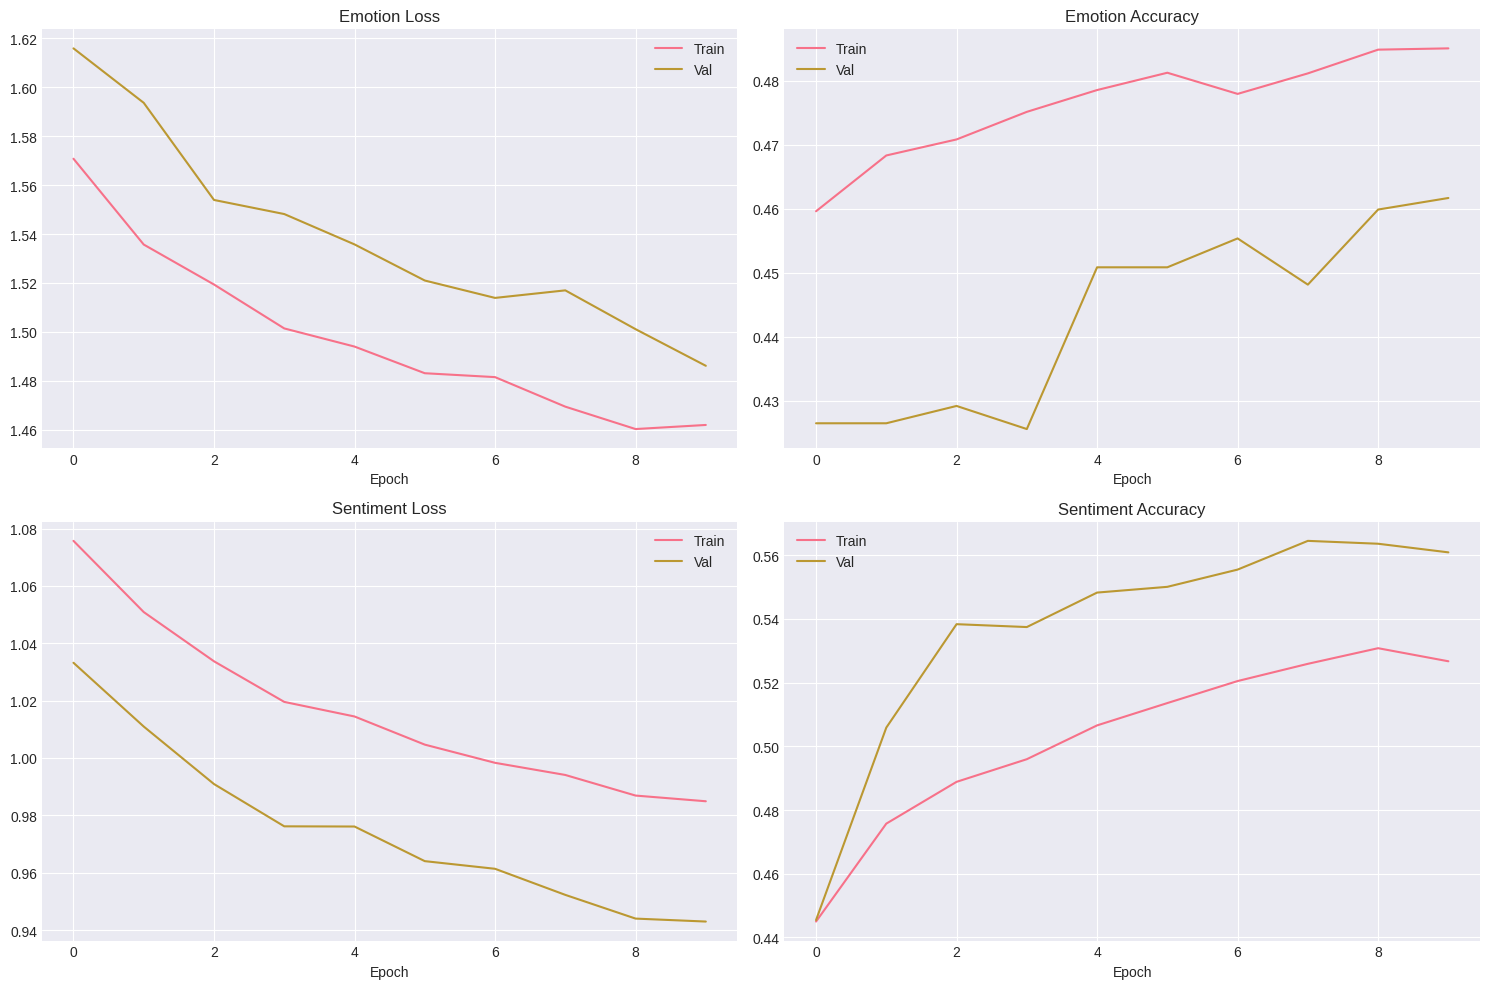

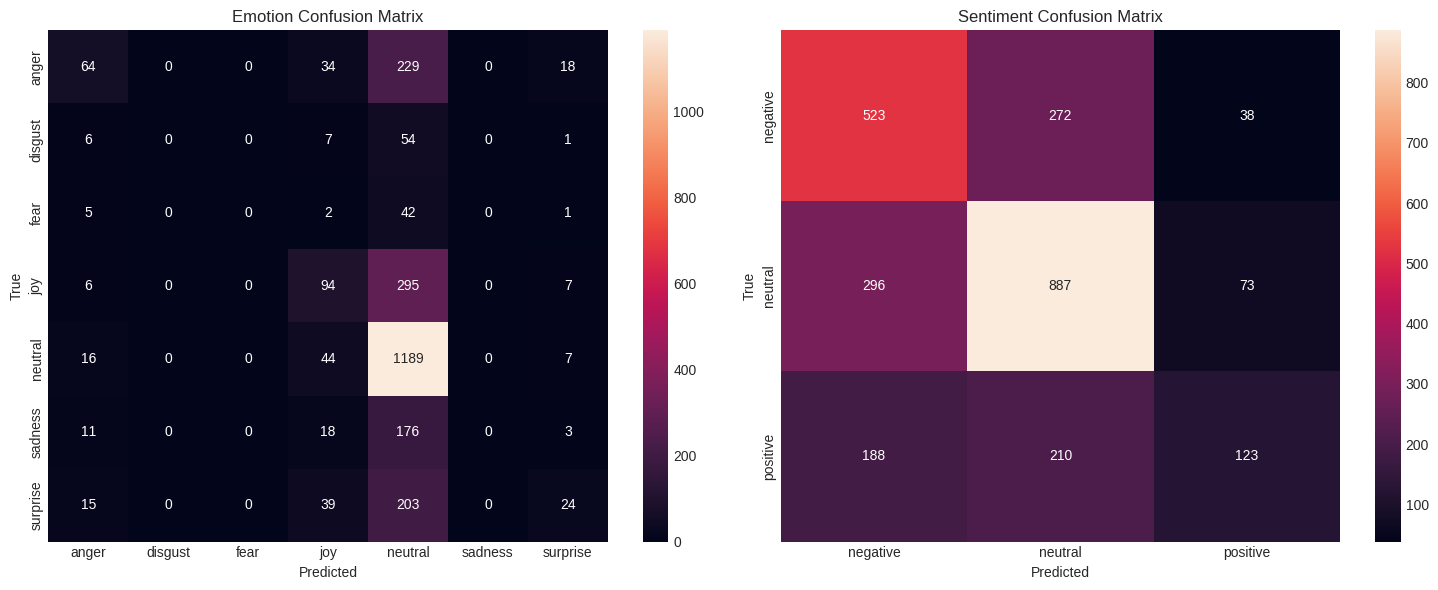

In [61]:
if __name__ == "__main__":
    model, history, results = main()

## 7. Data Augmentation

### 7.1 Data Augmentation

In [51]:
class TextAugmenter:
    """Text augmentation for handling class imbalance"""
    def __init__(self, augmentation_techniques=['swap', 'delete', 'synonym']):
        self.techniques = augmentation_techniques

    def augment(self, text, num_augmented=2):
        """Generate augmented versions of text"""
        augmented_texts = []

        for _ in range(num_augmented):
            augmented = text
            technique = np.random.choice(self.techniques)

            if technique == 'swap':
                augmented = self._random_swap(augmented)
            elif technique == 'delete':
                augmented = self._random_deletion(augmented)
            elif technique == 'synonym':
                augmented = self._synonym_replacement(augmented)

            augmented_texts.append(augmented)

        return augmented_texts

    def _random_swap(self, text):
        """Randomly swap two words"""
        words = text.split()
        if len(words) < 2:
            return text

        idx1, idx2 = np.random.choice(len(words), 2, replace=False)
        words[idx1], words[idx2] = words[idx2], words[idx1]

        return ' '.join(words)

    def _random_deletion(self, text):
        """Randomly delete a word"""
        words = text.split()
        if len(words) < 2:
            return text

        idx = np.random.randint(0, len(words))
        words.pop(idx)

        return ' '.join(words)

    def _synonym_replacement(self, text):
        """Replace words with synonyms (simplified)"""
        # In practice, use WordNet or similar
        return text

In [52]:
class AugmentedDataGenerator(MELDDataGenerator):
    """Data generator with augmentation"""
    def __init__(self, *args, augmenter=None, augment_minority_classes=True, **kwargs):
        super().__init__(*args, **kwargs)
        self.augmenter = augmenter or TextAugmenter()
        self.augment_minority_classes = augment_minority_classes

        if self.augment_minority_classes:
            self._augment_data()

    def _augment_data(self):
        """Augment minority class samples"""
        # Count emotion frequencies
        emotion_counts = np.bincount(self.emotions)
        max_count = np.max(emotion_counts)

        augmented_utterances = []
        augmented_contexts = []
        augmented_emotions = []
        augmented_sentiments = []

        for emotion_idx, count in enumerate(emotion_counts):
            if count < max_count * 0.5:  # Minority class
                # Find samples with this emotion
                indices = [i for i, e in enumerate(self.emotions) if e == emotion_idx]

                # Augment samples
                for idx in indices:
                    aug_texts = self.augmenter.augment(self.utterances[idx])
                    for aug_text in aug_texts:
                        augmented_utterances.append(aug_text)
                        augmented_contexts.append(self.contexts[idx])
                        augmented_emotions.append(self.emotions[idx])
                        augmented_sentiments.append(self.sentiments[idx])

        # Add augmented data
        self.utterances.extend(augmented_utterances)
        self.contexts.extend(augmented_contexts)
        self.emotions.extend(augmented_emotions)
        self.sentiments.extend(augmented_sentiments)

        # Update indices
        self.indices = np.arange(len(self.utterances))
        if self.shuffle:
            np.random.shuffle(self.indices)

### 7.2 Multimodal Integration

In [53]:
class MultimodalMELDModel(tf.keras.Model):
    """Multimodal model for text, audio, and visual features"""
    def __init__(self, text_model_name='bert-base-uncased',
                 audio_dim=768, visual_dim=2048,
                 num_emotions=7, num_sentiments=3, dropout_rate=0.3):
        super(MultimodalMELDModel, self).__init__()

        # Text encoder
        self.text_encoder = TFAutoModel.from_pretrained(text_model_name)
        text_hidden_size = self.text_encoder.config.hidden_size

        # Audio encoder
        self.audio_encoder = tf.keras.Sequential([
            layers.Dense(512, activation='relu'),
            layers.Dropout(dropout_rate),
            layers.Dense(256, activation='relu'),
            layers.Dropout(dropout_rate),
            layers.Dense(256)
        ])

        # Visual encoder
        self.visual_encoder = tf.keras.Sequential([
            layers.Dense(512, activation='relu'),
            layers.Dropout(dropout_rate),
            layers.Dense(256, activation='relu'),
            layers.Dropout(dropout_rate),
            layers.Dense(256)
        ])

        # Fusion attention
        self.fusion_attention = layers.MultiHeadAttention(
            num_heads=8, key_dim=64
        )

        # Fusion layers
        fusion_dim = text_hidden_size + 256 + 256
        self.fusion_layers = tf.keras.Sequential([
            layers.Dense(512, activation='relu'),
            layers.Dropout(dropout_rate),
            layers.Dense(256, activation='relu'),
            layers.Dropout(dropout_rate)
        ])

        # Output heads
        self.emotion_output = layers.Dense(num_emotions, name='emotion')
        self.sentiment_output = layers.Dense(num_sentiments, name='sentiment')

    def call(self, inputs, training=False):
        # Text features
        text_outputs = self.text_encoder(
            inputs['input_ids'],
            attention_mask=inputs['attention_mask'],
            training=training
        )
        text_features = text_outputs.pooler_output

        # Initialize feature list
        features_list = [text_features]

        # Audio features
        if 'audio_features' in inputs:
            audio_encoded = self.audio_encoder(inputs['audio_features'], training=training)
            features_list.append(audio_encoded)

        # Visual features
        if 'visual_features' in inputs:
            visual_encoded = self.visual_encoder(inputs['visual_features'], training=training)
            features_list.append(visual_encoded)

        # Concatenate features
        if len(features_list) > 1:
            combined_features = tf.concat(features_list, axis=-1)

            # Apply fusion
            fused_features = self.fusion_layers(combined_features, training=training)

            # Self-attention on fused features
            fused_features = tf.expand_dims(fused_features, axis=1)
            attended_features = self.fusion_attention(
                fused_features, fused_features,
                training=training
            )
            final_features = tf.squeeze(attended_features, axis=1)
        else:
            final_features = text_features

        # Predictions
        emotion_logits = self.emotion_output(final_features)
        sentiment_logits = self.sentiment_output(final_features)

        return {
            'emotion': emotion_logits,
            'sentiment': sentiment_logits
        }

## 8. Inference and Deployment

In [62]:
class EmotionSentimentPredictor:
    """Inference class for emotion and sentiment prediction"""
    def __init__(self, model_path, model_type='bert', tokenizer_name='bert-base-uncased'):
        self.model_type = model_type
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

        # Load label mappings
        with open('data/label_mappings.json', 'r') as f:
            self.mappings = json.load(f)

        # Initialize and load model
        if model_type == 'bert':
            self.model = BERTMultiTaskModel(
                model_name=tokenizer_name,
                num_emotions=len(self.mappings['emotion_to_idx']),
                num_sentiments=len(self.mappings['sentiment_to_idx'])
            )

        # Build model with proper dtype
        dummy_input = {
            'input_ids': tf.zeros((1, 128), dtype=tf.int32),
            'attention_mask': tf.ones((1, 128), dtype=tf.int32)
        }
        _ = self.model(dummy_input)

        # Load weights
        self.model.load_weights(model_path)

    @tf.function
    def predict_batch(self, input_ids, attention_mask):
        """Optimized prediction for batches"""
        # Ensure proper dtypes
        input_ids = tf.cast(input_ids, tf.int32)
        attention_mask = tf.cast(attention_mask, tf.int32)

        inputs = {
            'input_ids': input_ids,
            'attention_mask': attention_mask
        }

        predictions = self.model(inputs, training=False)

        emotion_probs = tf.nn.softmax(predictions['emotion'])
        sentiment_probs = tf.nn.softmax(predictions['sentiment'])

        emotion_preds = tf.argmax(emotion_probs, axis=-1)
        sentiment_preds = tf.argmax(sentiment_probs, axis=-1)

        return {
            'emotion_preds': emotion_preds,
            'sentiment_preds': sentiment_preds,
            'emotion_probs': emotion_probs,
            'sentiment_probs': sentiment_probs
        }

    def predict(self, text, context=None):
        """Predict emotion and sentiment for single text"""
        # Prepare text
        if context:
            full_text = f"{context} [SEP] {text}"
        else:
            full_text = text

        # Tokenize
        encoded = self.tokenizer(
            full_text,
            padding='max_length',
            truncation=True,
            max_length=128,
            return_tensors='tf'
        )

        # Predict
        predictions = self.predict_batch(
            encoded['input_ids'],
            encoded['attention_mask']
        )

        emotion_idx = predictions['emotion_preds'][0].numpy()
        sentiment_idx = predictions['sentiment_preds'][0].numpy()

        return {
            'emotion': self.mappings['idx_to_emotion'][str(emotion_idx)],
            'sentiment': self.mappings['idx_to_sentiment'][str(sentiment_idx)],
            'emotion_probabilities': predictions['emotion_probs'][0].numpy().tolist(),
            'sentiment_probabilities': predictions['sentiment_probs'][0].numpy().tolist()
        }

    def predict_dialogue(self, utterances, speakers=None):
        """Predict for entire dialogue"""
        predictions = []
        context = ""

        for i, utterance in enumerate(utterances):
            # Add speaker if available
            if speakers:
                utterance_with_speaker = f"{speakers[i]}: {utterance}"
            else:
                utterance_with_speaker = utterance

            # Predict
            pred = self.predict(utterance, context)
            predictions.append(pred)

            # Update context
            if context:
                context = f"{context} [SEP] {utterance_with_speaker}"
            else:
                context = utterance_with_speaker

            # Limit context length
            if len(context.split()) > 100:
                context = ' '.join(context.split()[-100:])

        return predictions

In [63]:
# Fixed TensorFlow Serving export function
def export_for_serving(model, export_path):
    """Export model for TensorFlow Serving with proper dtype handling"""

    # Create a serving function with explicit dtype conversions
    @tf.function
    def serving_fn(examples):
        # Parse the examples (assuming they come as strings)
        input_ids = examples['input_ids']
        attention_mask = examples['attention_mask']

        # Ensure proper dtypes
        input_ids = tf.cast(input_ids, tf.int32)
        attention_mask = tf.cast(attention_mask, tf.int32)

        inputs = {
            'input_ids': input_ids,
            'attention_mask': attention_mask
        }

        predictions = model(inputs, training=False)

        emotion_probs = tf.nn.softmax(predictions['emotion'])
        sentiment_probs = tf.nn.softmax(predictions['sentiment'])

        return {
            'emotion_logits': predictions['emotion'],
            'sentiment_logits': predictions['sentiment'],
            'emotion_probs': emotion_probs,
            'sentiment_probs': sentiment_probs,
            'emotion_predictions': tf.argmax(emotion_probs, axis=-1),
            'sentiment_predictions': tf.argmax(sentiment_probs, axis=-1)
        }

    # Get concrete function with proper signatures
    concrete_serving_fn = serving_fn.get_concrete_function(
        examples={
            'input_ids': tf.TensorSpec(shape=[None, None], dtype=tf.int32, name='input_ids'),
            'attention_mask': tf.TensorSpec(shape=[None, None], dtype=tf.int32, name='attention_mask')
        }
    )

    # Save the model
    tf.saved_model.save(
        model,
        export_path,
        signatures={'serving_default': concrete_serving_fn}
    )
    print(f"Model exported to {export_path}")



In [71]:
def export_keras_model(model, export_path):
    """Export model using Keras SavedModel format with proper file extension"""
    # Define the inference function
    @tf.function
    def inference(input_ids, attention_mask):
        # Ensure proper dtypes
        input_ids = tf.cast(input_ids, tf.int32)
        attention_mask = tf.cast(attention_mask, tf.int32)

        inputs = {
            'input_ids': input_ids,
            'attention_mask': attention_mask
        }

        return model(inputs, training=False)

    # Ensure directory exists
    os.makedirs(os.path.dirname(export_path) if os.path.dirname(export_path) else '.', exist_ok=True)

    # Add proper extension if not present
    if not export_path.endswith('.keras') and not export_path.endswith('.h5'):
        export_path = export_path.rstrip('/') + '.keras'

    # Save using Keras native format
    model.save(export_path, overwrite=True)
    print(f"Keras model saved to {export_path}")

In [66]:
def load_and_test_saved_model(saved_model_path):
    """Load and test the exported SavedModel"""
    # Load the SavedModel
    loaded_model = tf.saved_model.load(saved_model_path)

    # Get the serving function
    serving_fn = loaded_model.signatures['serving_default']

    # Test with dummy input
    test_input = {
        'input_ids': tf.constant([[101, 2054, 2003, 2115, 2171, 102, 0, 0]], dtype=tf.int32),
        'attention_mask': tf.constant([[1, 1, 1, 1, 1, 1, 0, 0]], dtype=tf.int32)
    }

    # Make prediction
    output = serving_fn(**test_input)

    print("SavedModel test successful!")
    print(f"Output keys: {list(output.keys())}")
    return output

In [67]:
def create_tflite_model(saved_model_path, tflite_path):
    """Convert SavedModel to TFLite for mobile/edge deployment"""
    # Load the converter
    converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)

    # Optimize for size (optional)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]

    # Convert
    tflite_model = converter.convert()

    # Save
    with open(tflite_path, 'wb') as f:
        f.write(tflite_model)

    print(f"TFLite model saved to {tflite_path}")

In [73]:
# usage
if __name__ == "__main__":
  try:
      # Initialize predictor
      predictor = EmotionSentimentPredictor(
          model_path='best_bert_model.weights.h5', #best_bert_model.weights.h5
          model_type='bert'
      )

      # Single prediction
      result = predictor.predict(
          text="I can't believe you did that!",
          context="We were supposed to meet at 5pm."
      )
      print(f"Emotion: {result['emotion']}, Sentiment: {result['sentiment']}")

      # Dialogue prediction
      dialogue = [
          "How are you doing today?",
          "Not great, I lost my job.",
          "Oh no, I'm so sorry!",
          "Thanks, I'll be okay."
      ]

      dialogue_predictions = predictor.predict_dialogue(dialogue)
      for i, (utt, pred) in enumerate(zip(dialogue, dialogue_predictions)):
          print(f"Utterance: {utt}")
          print(f"  -> Emotion: {pred['emotion']}, Sentiment: {pred['sentiment']}")

      # Single prediction
      result = predictor.predict(
          text="I'm so frustrated with this service!",
          context="I've been waiting for 2 hours"
        )

      print(f"Emotion: {result['emotion']}, Sentiment: {result['sentiment']}")

      #export_for_serving(model, './saved_model/1/')
      # Export for serving - use the predictor's model
      print("\nExporting model for TensorFlow Serving...")
      export_for_serving(predictor.model, './saved_model/1/')

      # Alternative: Export as Keras SavedModel
      print("\nExporting as Keras SavedModel...")
      export_keras_model(predictor.model, './keras_saved_model/')
  except Exception as e:
      print(f"Error: {e}")
      print("\nTroubleshooting tips:")
      print("1. Ensure mixed precision is disabled for inference")
      print("2. Check that input tensors have correct dtypes (int32 for input_ids)")
      print("3. Verify model weights are loaded correctly")
      print("4. Consider using export_keras_model() if export_for_serving() fails")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Emotion: neutral, Sentiment: negative
Utterance: How are you doing today?
  -> Emotion: neutral, Sentiment: neutral
Utterance: Not great, I lost my job.
  -> Emotion: neutral, Sentiment: neutral
Utterance: Oh no, I'm so sorry!
  -> Emotion: neutral, Sentiment: neutral
Utterance: Thanks, I'll be okay.
  -> Emotion: neutral, Sentiment: neutral
Emotion: surprise, Sentiment: negative

Exporting model for TensorFlow Serving...
Model exported to ./saved_model/1/

Exporting as Keras SavedModel...
Keras model saved to ./keras_saved_model.keras


## Summary

This TensorFlow implementation provides:

1. **Data Processing**: Custom data generators with batching and augmentation
2. **Model Architectures**:
   - LSTM with bidirectional layers
   - BERT/RoBERTa with TensorFlow integration
   - DialogueRNN with attention mechanisms
   - COSMIC-style model with cross-attention
3. **Advanced Features**:
   - Focal loss for extreme imbalance
   - Text augmentation for minority classes
   - Multimodal fusion architecture
   - Mixed precision training support
4. **Training Pipeline**:
   - Callbacks for checkpointing and early stopping
   - TensorBoard integration
   - Learning rate scheduling
5. **Production Features**:
   - Optimized inference with @tf.function
   - TensorFlow Serving export
   - Batch prediction support

The implementation is modular and can be easily extended with new architectures or features.